# Fashion MNIST



In [0]:
from torchvision.datasets.mnist import MNIST


class FashionMNIST(MNIST):
    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
    Args:
        root (string): Root directory of dataset where ``processed/training.pt``
            and  ``processed/test.pt`` exist.
        train (bool, optional): If True, creates dataset from ``training.pt``,
            otherwise from ``test.pt``.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """
    urls = [
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
            ]

In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.autograd import Variable
import torchvision
import torch.nn.functional as F
#from fashion import FashionMNIST
import torchvision.transforms as transforms
from torch import nn
from torch import optim

In [0]:
train_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

valid_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [0]:
train_idx = np.random.choice(train_data.train_data.shape[0], 54000, replace=False)

In [0]:
train_data.train_data = train_data.train_data[train_idx, :]
train_data.train_labels = train_data.train_labels[torch.from_numpy(train_idx).type(torch.LongTensor)]

In [0]:
mask = np.ones(60000)
mask[train_idx] = 0

In [0]:
valid_data.train_data = valid_data.train_data[torch.from_numpy(np.argwhere(mask)), :].squeeze()
valid_data.train_labels = valid_data.train_labels[torch.from_numpy(mask).type(torch.ByteTensor)]

In [0]:
batch_size = 100
test_batch_size = 100

train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data,
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


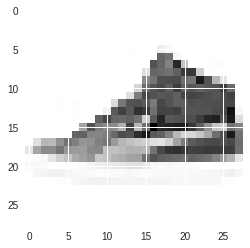

In [9]:
plt.imshow(train_loader.dataset.train_data[1].numpy())

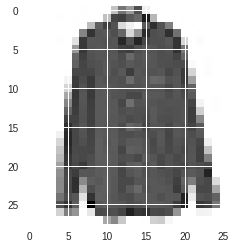

In [10]:
plt.imshow(train_loader.dataset.train_data[10].numpy())

In [0]:
class FcNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, image):
        batch_size = image.size()[0]
        x = image.view(batch_size, -1)
        x = torch.sigmoid(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x    

In [0]:
class CNN_2_16_32(nn.Module):
    def __init__(self):
        super(CNN_2_16_32, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 32, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_2_32_64(nn.Module):
    def __init__(self):
        super(CNN_2_32_64, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_2_64_128(nn.Module):
    def __init__(self):
        super(CNN_2_64_128, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 128, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_3_16_32_64(nn.Module):
    def __init__(self):
        super(CNN_3_16_32_64, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(9 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_3_32_64_128(nn.Module):
    def __init__(self):
        super(CNN_3_32_64_128, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(9 * 128, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
def train(model, train_loader, optimizer):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data), Variable(target)
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)  # calls the forward function
        loss = criterion(output, target)
        #loss = F.nll_loss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model


def valid(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    for data, target in valid_loader:
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data, volatile=True), Variable(target)
        data, target = data.cuda(), target.cuda()
        output = model.forward(data)
        valid_loss += criterion(output, target).item()
        #valid_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    valid_loss /= len(valid_loader.dataset)
        
    print('\n' + "valid" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        valid_loss, correct, len(valid_loader.dataset),
        100. * correct / len(valid_loader.dataset)))
    
    return (valid_loss, correct / len(valid_loader.dataset))

    
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    for data, target in test_loader:
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data, volatile=True), Variable(target)
        data, target = data.cuda(), target.cuda()
        output = model.forward(data)
        test_loss += criterion(output, target).item()
        #test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n' + "test" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    
def experiment(model, epochs=10, lr=0.001):
    best_precision = 0
    best_model = nn.Module()
    losses = []
    accuracies = []
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        model = train(model, train_loader, optimizer)
        loss, precision = valid(model, valid_loader)
        losses.append(loss)
        accuracies.append(precision)
        if precision > best_precision:
            best_precision = precision
            best_model = model
    
    plt.plot( losses )
    plt.title("Losses")
    plt.figure()
    plt.title("Accuracies")
    plt.plot( accuracies )
    plt.show()

    return best_model, best_precision

    


FcNetwork

valid set: Average loss: 0.0041, Accuracy: 5099/6000 (85%)


valid set: Average loss: 0.0037, Accuracy: 5190/6000 (86%)


valid set: Average loss: 0.0036, Accuracy: 5214/6000 (87%)


valid set: Average loss: 0.0033, Accuracy: 5286/6000 (88%)


valid set: Average loss: 0.0032, Accuracy: 5280/6000 (88%)


valid set: Average loss: 0.0032, Accuracy: 5317/6000 (89%)


valid set: Average loss: 0.0031, Accuracy: 5320/6000 (89%)


valid set: Average loss: 0.0031, Accuracy: 5294/6000 (88%)


valid set: Average loss: 0.0030, Accuracy: 5351/6000 (89%)


valid set: Average loss: 0.0031, Accuracy: 5305/6000 (88%)



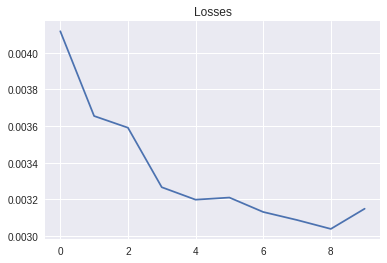

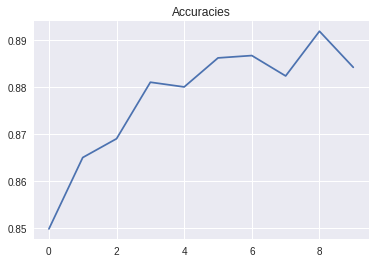


CNN_2_16_32

valid set: Average loss: 0.0036, Accuracy: 5210/6000 (87%)


valid set: Average loss: 0.0031, Accuracy: 5330/6000 (89%)


valid set: Average loss: 0.0030, Accuracy: 5333/6000 (89%)


valid set: Average loss: 0.0029, Accuracy: 5377/6000 (90%)


valid set: Average loss: 0.0029, Accuracy: 5363/6000 (89%)


valid set: Average loss: 0.0028, Accuracy: 5378/6000 (90%)


valid set: Average loss: 0.0029, Accuracy: 5356/6000 (89%)


valid set: Average loss: 0.0028, Accuracy: 5422/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5434/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5456/6000 (91%)



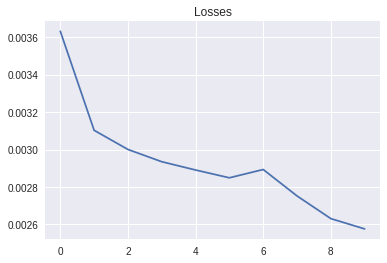

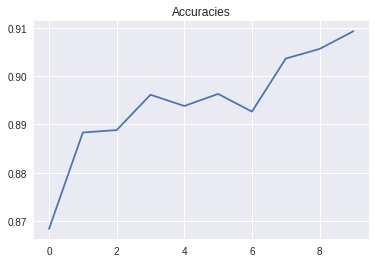


CNN_2_32_64

valid set: Average loss: 0.0036, Accuracy: 5196/6000 (87%)


valid set: Average loss: 0.0031, Accuracy: 5321/6000 (89%)


valid set: Average loss: 0.0029, Accuracy: 5393/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5417/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5444/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5448/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5403/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5433/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5475/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5491/6000 (92%)



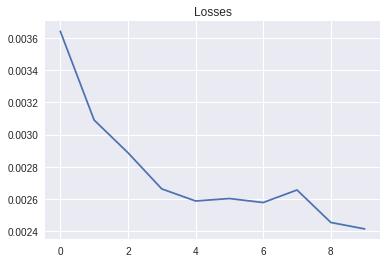

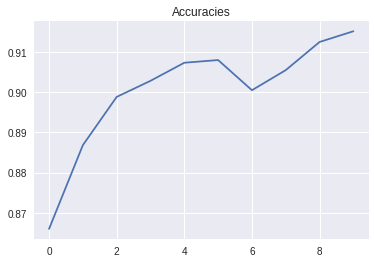


CNN_2_64_128

valid set: Average loss: 0.0035, Accuracy: 5247/6000 (87%)


valid set: Average loss: 0.0032, Accuracy: 5306/6000 (88%)


valid set: Average loss: 0.0029, Accuracy: 5362/6000 (89%)


valid set: Average loss: 0.0027, Accuracy: 5410/6000 (90%)


valid set: Average loss: 0.0029, Accuracy: 5373/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5427/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5438/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5467/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5464/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5451/6000 (91%)



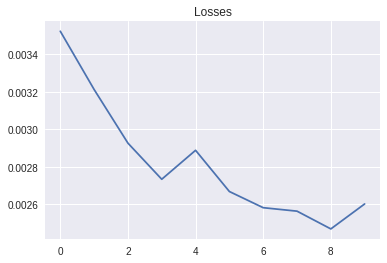

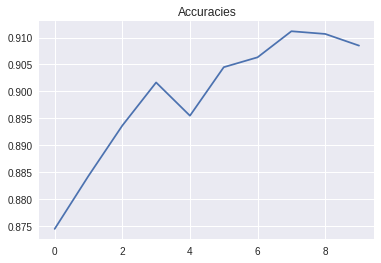


CNN_3_16_32_64

valid set: Average loss: 0.0034, Accuracy: 5254/6000 (88%)


valid set: Average loss: 0.0032, Accuracy: 5305/6000 (88%)


valid set: Average loss: 0.0028, Accuracy: 5381/6000 (90%)


valid set: Average loss: 0.0028, Accuracy: 5401/6000 (90%)


valid set: Average loss: 0.0028, Accuracy: 5371/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5423/6000 (90%)


valid set: Average loss: 0.0025, Accuracy: 5459/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5446/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5460/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5482/6000 (91%)



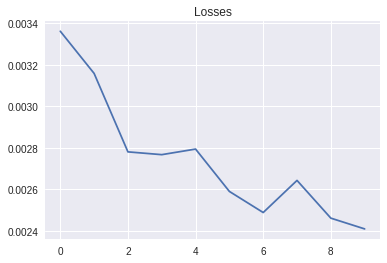

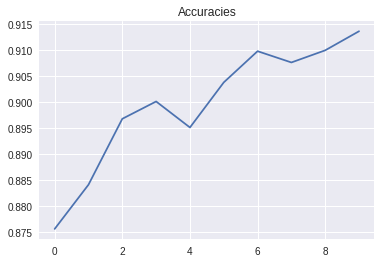


CNN_3_32_64_128

valid set: Average loss: 0.0033, Accuracy: 5280/6000 (88%)


valid set: Average loss: 0.0031, Accuracy: 5329/6000 (89%)


valid set: Average loss: 0.0028, Accuracy: 5379/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5434/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5461/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5463/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5471/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5474/6000 (91%)


valid set: Average loss: 0.0023, Accuracy: 5508/6000 (92%)


valid set: Average loss: 0.0024, Accuracy: 5518/6000 (92%)



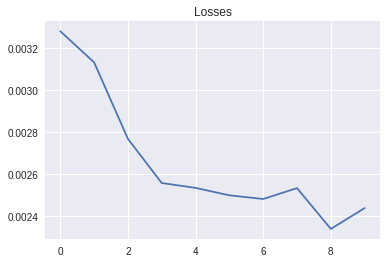

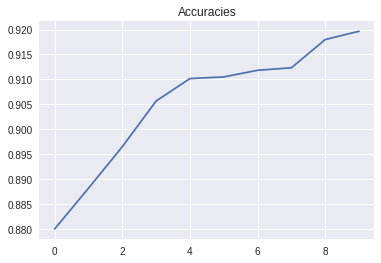


test set: Average loss: 0.0025, Accuracy: 9107/10000 (91%)



In [18]:
best_precision = 0
for model in [FcNetwork(), CNN_2_16_32(), CNN_2_32_64(), CNN_2_64_128(), CNN_3_16_32_64(), CNN_3_32_64_128()]:  # add your models in the list
    model.cuda()  # if you have access to a gpu
    print('\n' + model.__class__.__name__)
    model, precision = experiment(model)
    if precision > best_precision:
        best_precision = precision
        best_model = model

test(best_model, test_loader)